In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#getting reddening values

data = pd.read_csv('my_stars_file_with_stilism_reddening.csv')

reddening = data['reddening[mag][stilism]']
distance = data['distance']

In [6]:
from dustmaps.config import config
config['data_dir'] = '/path/to/store/maps/in'

import dustmaps.bayestar
dustmaps.bayestar.fetch()

ModuleNotFoundError: No module named 'dustmaps'

In [5]:
#reddening values from dust maps by Green (2018)

from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarWebQuery

green_reddening = []
l = data['l']
b = data['b']

for i in range(len(distance)):
    bayestar = BayestarWebQuery(version='bayestar2017')
    coords = SkyCoord(l[i]*units.deg, b[i]*units.deg,
                   distance=distance[i]*units.pc, frame='galactic')

    g_reddening = bayestar(coords, mode='random_sample')
    green_reddening.append(g_reddening)


ModuleNotFoundError: No module named 'dustmaps'

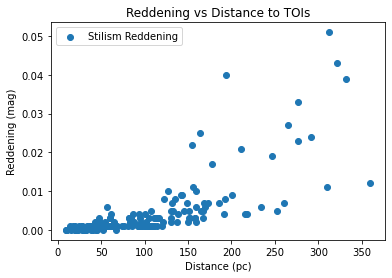

In [3]:
#plot of reddening vs distance

plt.scatter(distance,reddening, label='Stilism')
plt.scatter(distance, green_reddening, label='Green')
plt.xlabel('Distance (pc)')
plt.ylabel('Reddening (mag)')
plt.title('Reddening vs Distance to TOIs')
plt.legend()

plt.show()